<a href="https://colab.research.google.com/github/GuilhermeNishimoto/cinetica_secagem/blob/main/modelagem_cinetica_secagem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from google.colab import files

In [2]:
warnings.filterwarnings("ignore", category=RuntimeWarning) 

# Data Loading

In [3]:
df = pd.read_excel("dados_cinetica_secagem.xlsx")

# Modelos Matemáticos de Curva de Secagem:

#### Modelo de Newton

In [4]:
def modelo_newton(t, k):
    return np.exp(- k * t)

#### Modelo de Page

In [5]:
def modelo_page(t, k, n):
    return np.exp(- k * (t ** n))

#### Modelo de Midilli

In [6]:
def modelo_midilli(t, a, k, n, b):
    return a * np.exp(- k * (t ** n)) - (b * t)

#### Modelo de Page Modificado

In [7]:
def modelo_page_modificado(t, k, n):
    return np.exp(-((k * n) ** n))

#### Modelo de Weibull

In [8]:
def modelo_weibull(t, a, b):
    return np.exp(- ((t / a) ** b))

# Análises Estatísticas

#### Coeficiente de Determinação (R²)
[sklearn.metrics.r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html)

#### Erro Médio

$$
SE = \left[ \frac{\sum_{\left( X_{experimental}  - X_{modelo}\right)^2}^{}}{n} \right]^\frac{1}{2}
$$

In [9]:
def erro_medio(df, col_exp, col_mod, n):
    return math.sqrt(pow(sum(df[col_exp] - df[col_mod]), 2)/n)

# Fitting

#### Modelo de Newton

In [10]:
def fit_modelo_newton(df, modelo = modelo_newton):

    name = modelo.__name__
    
    popt, pcov = curve_fit(
    f = modelo,
    xdata = df['time'],
    ydata = df['experimental'],
    )

    # Parameters 
    k = popt[0]
    n = len(popt)

    # Standard Error of the parameters
    standard_error = np.sqrt(np.diag(pcov))

    df[f'{name}'] = modelo(df['time'], k)

    # Coefficient of Determination
    r2 = r2_score(df['experimental'], df[f'{name}'])

    se = erro_medio(df, col_exp = 'experimental', col_mod = f'{name}', n = n)

    print(
    f''' Modelo de Newton:
    
    Estimated value of k: {k} +/- {standard_error[0]}
    
    R²: {r2}
    SE: {se}
    -----------------------------------------------------------------------------
    '''
    )

#### Modelo de Weibull

In [11]:
def fit_modelo_weibull(df, modelo = modelo_weibull):

    name = modelo.__name__
    
    popt, pcov = curve_fit(
    f = modelo,
    xdata = df['time'],
    ydata = df['experimental'],
    )

    # Parameters 
    a, b = popt
    n = len(popt)

    # Standard Error of the parameters
    standard_error = np.sqrt(np.diag(pcov))

    df[f'{name}'] = modelo(df['time'], a, b)

    # Coefficient of Determination
    r2 = r2_score(df['experimental'], df[f'{name}'])

    se = erro_medio(df, col_exp = 'experimental', col_mod = f'{name}', n = n)

    print(
    f'''Modelo de Weibull:
    
    Estimated value of a: {a} +/- {standard_error[0]}
    Estimated value of b: {b} +/- {standard_error[1]}
    
    R²: {r2}
    SE: {se}
    -----------------------------------------------------------------------------
    '''
    )

#### Results

In [12]:
fit_modelo_newton(df)
fit_modelo_weibull(df)

 Modelo de Newton:
    
    Estimated value of k: 0.022959831081044768 +/- 0.00029035385931794105
    
    R²: 0.9961437373113632
    SE: 0.16365855365353169
    -----------------------------------------------------------------------------
    
Modelo de Weibull:
    
    Estimated value of a: 43.80085824319294 +/- 0.4533847152126296
    Estimated value of b: 1.0636171106645202 +/- 0.017884116346970413
    
    R²: 0.9973325027666043
    SE: 0.12335201695061786
    -----------------------------------------------------------------------------
    


# Plotting

#### Function

In [13]:
def plot_grafico(df, col):

    # Define as dimensões do gráfico
    fig, ax = plt.subplots(figsize = (6, 4))

    # Gráfico de pontos
    ax1 = sns.scatterplot(
        data = df,
        x = 'time',
        y = 'experimental',
        color = 'black',
        label = 'Experimental',
        ax = ax # Argumento para que os gráficos dividam o eixo y 
    )

    # Gráfico de Linha
    ax2 = sns.lineplot(
        data = df,
        x = 'time',
        y = col,
        color = 'red',
        label = col,
        ax = ax # Argumento para que os gráficos dividam o eixo y 
    )

    # Renomeia os eixos x e y e o título do gráfico
    ax.set_xlabel("Tempo (minutos)", fontsize = 12)
    ax.set_ylabel("M (adimensional)", fontsize = 12)


    # Exclui a linha superior e a direita do gráfico
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    plt.legend()

    # Salva a figura
    plt.savefig(f'{col}.png', format = 'png')

    # Download da imagem
    # files.download(f'{nome_grafico}.png')

    plt.show()

#### Modelo de Newton

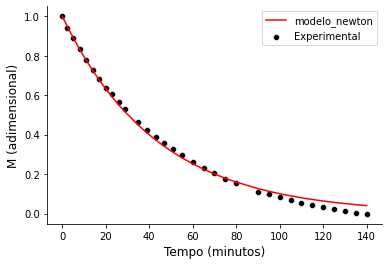

In [14]:
plot_grafico(df, 'modelo_newton')

#### Modelo de Weibull

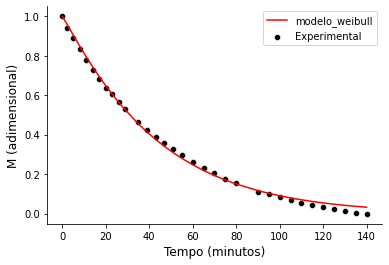

In [15]:
plot_grafico(df, 'modelo_weibull')